# Import Dataset

In [1]:
import pandas as pd
import sklearn as sk

In [2]:
# Replaced exercise.n.days.program.inc.week.0 with binary outcome column engaged binary
# Labeled first column record_id

u_eng = pd.read_csv("C:/Users/mfrid/Downloads/user_engagement_data.csv")

In [3]:
# Review current formatting of data
u_eng.head()

,record_id,date_of_birth,candidate_type,gender,team_start_date,engaged_binary,screening.activity.score,screening.intro.text.length,screening.pain.killers,screening.physio,...,screening.surgery.chance.next.year,screening.surgery.chance.next.two.years,screening.surgery.chance.next.five.years,screening.surgery.hinge.avoid,screening.vas.pain,screening.bmi,screening.koos.pain,screening.fear.avoidance,screening.barriers.sum,screening.STarT.full
0,1,5/27/1974,back,female,4/17/2017,1,0.0,230,1,0,...,14.2,38.2,47.4,1,32,36.580147,NaN,0,0,5.0
1,2,12/18/1964,back,female,4/17/2017,1,36.0,62,0,0,...,0.0,0.0,0.0,1,32,25.104677,NaN,0,1,2.0
2,3,2/15/1961,back,male,4/17/2017,0,0.0,196,1,1,...,25.0,35.0,55.1,0,69,22.957401,NaN,1,3,7.0
3,4,5/19/1972,back,male,4/17/2017,1,25.0,562,1,0,...,0.0,0.0,0.0,1,33,28.432995,NaN,0,0,4.0
4,5,1/8/1969,knee,female,4/17/2017,1,5.0,132,1,0,...,20.6,23.9,27.9,1,66,26.147247,36.111111,0,2,NaN


# Data Formatting and Missing Value Imputation

In [4]:
# Format Dates
u_eng['date_of_birth'] = pd.to_datetime(u_eng['date_of_birth'])
u_eng['team_start_date'] = pd.to_datetime(u_eng['team_start_date'])

# Removing columns that do not contain information of use: record_id
del u_eng['record_id']

# Changing candidate_type NaN's with screening.STarT.full='NaN' to 'knee', everything else will be 'back'
u_eng.loc[u_eng['screening.koos.pain'].isnull(),'candidate_type'] = 'knee'
u_eng.loc[u_eng['screening.koos.pain'].notnull(),'candidate_type'] = 'back'

# For candidate type knee change screening.koos.pain values to 100
u_eng.loc[u_eng['screening.koos.pain'].isnull(),'screening.koos.pain'] = 100

# Changing screening.STarT.full NaN's to 0
u_eng.loc[u_eng['screening.STarT.full'].isnull(),'screening.STarT.full'] = 0

# Feature Engineering

In [7]:
# Encoding Binary Categorical columns to numeric values (candidate_type, gender)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Scale non-binary columns to values between 0 and 1 with Min/Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Feature Engineering and Creating Training and Test Data sets
y= u_eng['engaged_binary']
X=pd.DataFrame({'candidate_type':le.fit_transform(u_eng['candidate_type']),
    'gender':le.fit_transform(u_eng['gender']),
    'date_of_birth':scaler.fit_transform(u_eng['date_of_birth']),
    'team_start_date':scaler.fit_transform(u_eng['team_start_date']),
    'screening.activity.score':scaler.fit_transform(u_eng['screening.activity.score']),
    'screening.intro.text.length':scaler.fit_transform(u_eng['screening.intro.text.length']),
    'screening.sedentary':scaler.fit_transform(u_eng['screening.sedentary']),
    'screening.catastrophizing.full':scaler.fit_transform(u_eng['screening.catastrophizing.full']),
    'screening.surgery.interest':scaler.fit_transform(u_eng['screening.surgery.interest']),
    'screening.surgery.chance.next.year':scaler.fit_transform(u_eng['screening.surgery.chance.next.year']),
    'screening.surgery.chance.next.two.years':scaler.fit_transform(u_eng['screening.surgery.chance.next.two.years']),
    'screening.surgery.chance.next.five.years':scaler.fit_transform(u_eng['screening.surgery.chance.next.five.years']),
    'screening.vas.pain':scaler.fit_transform(u_eng['screening.vas.pain']),
    'screening.bmi':scaler.fit_transform(u_eng['screening.bmi']),
    'screening.koos.pain':scaler.fit_transform(u_eng['screening.koos.pain']),
    'screening.barriers.sum':scaler.fit_transform(u_eng['screening.barriers.sum']),
    'screening.STarT.full':scaler.fit_transform(u_eng['screening.STarT.full']),
    'screening.pain.killers':u_eng['screening.pain.killers'],
    'screening.physio':u_eng['screening.physio'],
    'screening.surgery.hinge.avoid':u_eng['screening.surgery.hinge.avoid'],
    'screening.fear.avoidance':u_eng['screening.fear.avoidance']})

C:\Users\mfrid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\mfrid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\mfrid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\mfrid\Anaconda3\lib\site-p

# Creating Training and Test Datasets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Visualizing Feature Relationships

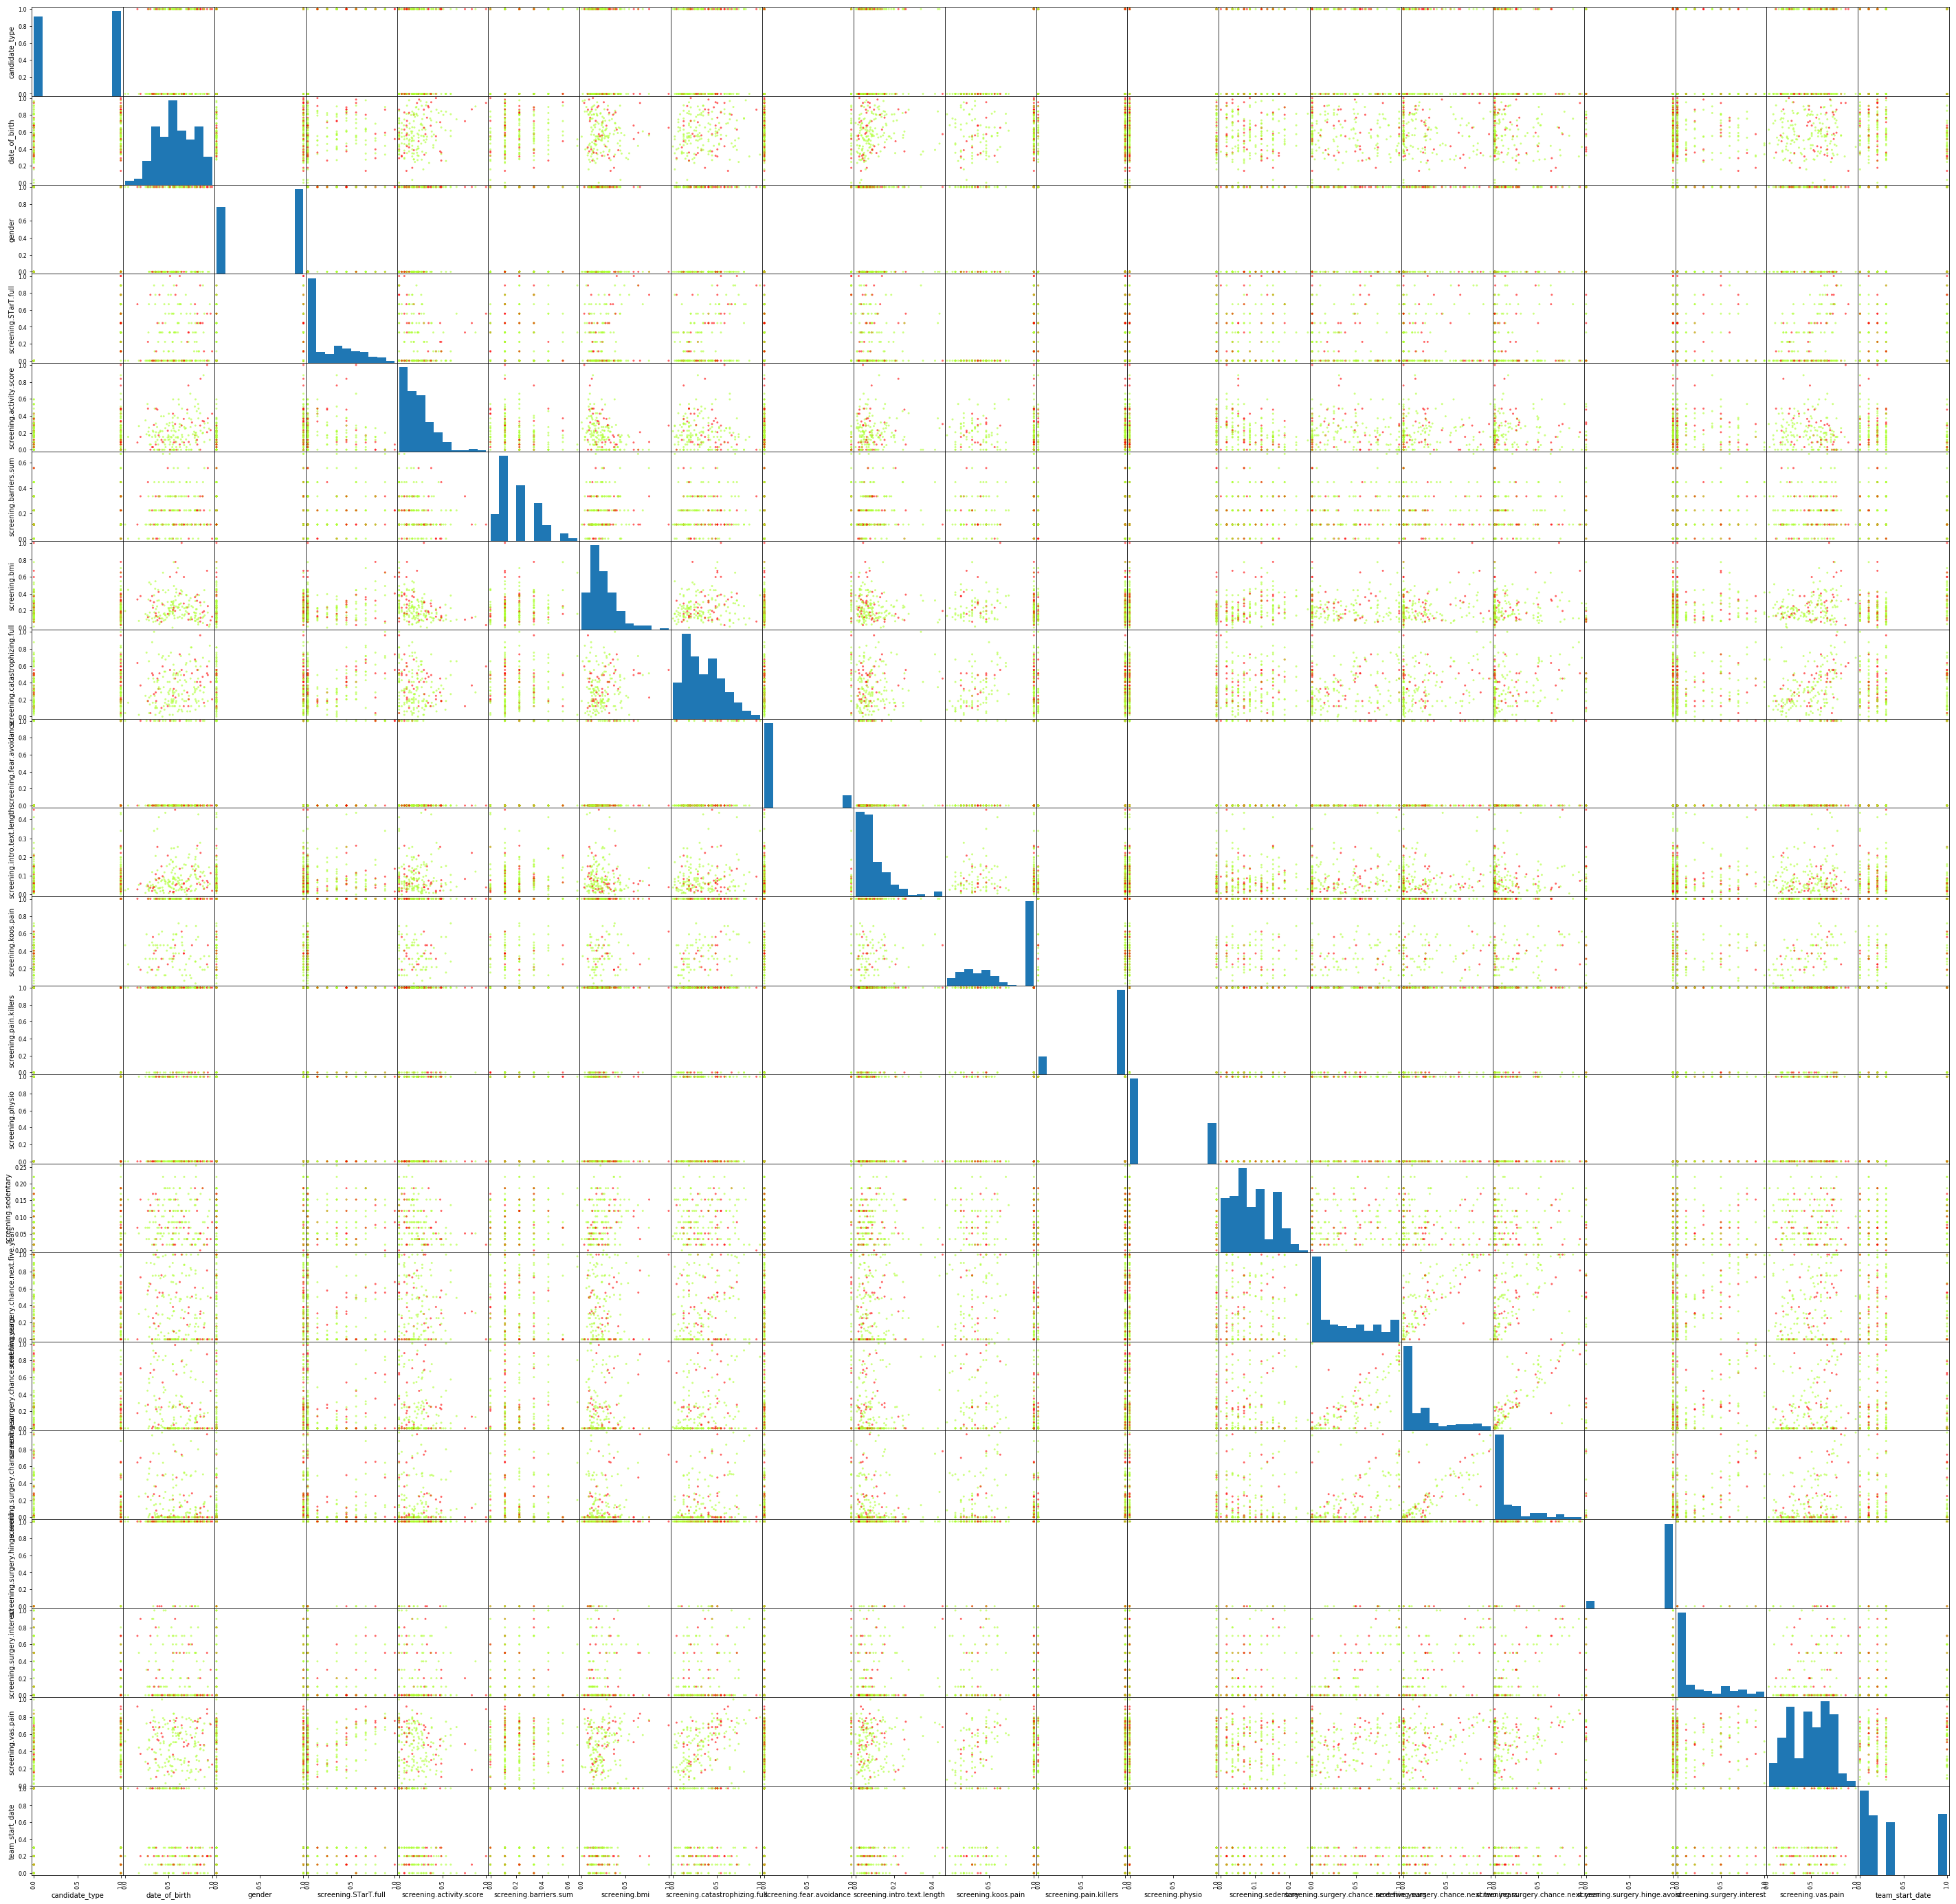

In [28]:
# Plot showing all feature combinations and resulting user engagement
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd

color_wheel = {1: "#ff0000", 
               2: "#adff2f"}
colors = y_train.map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(X_train, color=colors, alpha=0.6,figsize=(50,50),diagonal='hist')
plt.figure(dpi=600)

# Modeling Strategy

Determine Feature Importance and possible modeling prediction accuracy with an Ensemble of 5 different classifiers: LR, SV, RF, NB, AB

# Modeling with Logistic Regression

In [9]:
#Train a Logistic Regression Model with Stochastic Gradient Descent
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [10]:
# Logistic Regression Model Accuracy on 10% (hold-out data)
clf.score(X_test,y_test)
# Model Accuracy <50%, throwing out

0.45833333333333331

# Modeling with a Support Vector Classifier

In [13]:
#Train a Support Vector Machine Classifier
from sklearn import svm
clf = svm.SVC()
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(clf,cv=10,param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ])
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'gamma': [0.001, 0.0001], 'kernel': ['rbf'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
# Support Vector Classifier Model Accuracy on 20% (hold-out data)
clf.score(X_test,y_test)

0.8125

In [15]:
# Support Vector Classifier Feature Importance Analysis
clf.best_estimator_.coef_

array([[ -2.95811825e-04,  -2.25278023e-04,  -6.40056016e-04,
         -1.99499087e-04,  -2.32940513e-03,   8.08376490e-04,
         -4.39121902e-03,  -1.15281874e-03,   6.23038045e-05,
         -6.29695322e-04,   2.45787023e-04,   3.56704819e-04,
          1.52310638e-04,  -2.27817546e-04,   2.44722936e-03,
         -3.41890464e-03,   4.02419231e-04,   9.63665270e-04,
          1.45899199e-04,  -1.53992910e-04,   8.36671189e-04]])

<b>Feature Importance:</b><br>

1- Screening Sedentary<br>
2- Screening Barriers Sum<br>
3- Screening Activity Score<br>
4- Screening Surgery Chance Next Year<br>
5- Screening Koos Pain

# Modeling with a Random Forest Classifier

In [31]:
#Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(X_train,y_train)
# Random Forest Feature Importance Analysis
clf.feature_importances_

array([ 0.01117169,  0.11054265,  0.01073264,  0.09145148,  0.06527401,
        0.03546944,  0.0972039 ,  0.05538259,  0.00382041,  0.07248284,
        0.03760632,  0.01169273,  0.01601122,  0.04752288,  0.05082025,
        0.05138964,  0.06404203,  0.02595563,  0.01701372,  0.07878241,
        0.04563151])

In [32]:
# Random Forest Model Accuracy on 20% (hold-out data)
clf.score(X_test,y_test)

0.79166666666666663

<b>Feature Importance:</b><br>

1- Screening Activity Score<br>
2- Screening Surgery Chance Next Year<br>
3- Gender<br>
4- Screening Sedentary<br>

# Modeling with a Naive Bayes Classifier (Model Accuracy Only)

In [20]:
#Train Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None)

In [21]:
# Naive Bayes Accuracy on 20% (hold-out data)
clf.score(X_test,y_test)

0.77083333333333337

# Modeling with an Adaptive Boosting Classifier

In [22]:
#Train an Adaptive Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
clf= AdaBoostClassifier()
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [23]:
# Adaptive Boost Model Accuracy on 20% (hold-out data)
clf.score(X_test,y_test)

0.70833333333333337

In [24]:
# Adaptive Boosting Feature Importance Analysis
clf.feature_importances_

array([ 0.  ,  0.12,  0.02,  0.04,  0.12,  0.  ,  0.18,  0.1 ,  0.  ,
        0.06,  0.02,  0.  ,  0.  ,  0.02,  0.06,  0.1 ,  0.  ,  0.02,
        0.  ,  0.06,  0.08])

<b>Feature Importance:</b><br>
1- Screening Sedentary<br>
2- Screening Activity Score<br>
3- Gender<br>
4- Screening Catastrophizing Full<br>
5- Screening Barriers Sum<br>

# Summary

Our weakest acceptable model Adaptive Boosting Classifier achieved ~71% accuracy<br><br>
Our best performing model Support Vector Classifier achieved ~81% accuracy<br><br>
The average model accuracy(of acceptable models) is ~75%<br><br>
<b>Overall Feature Importance (# of Models Appeared in):</b><br>
1- Screening Sedentary(3)<br>
2- Screening Activity Score(3)<br>
3- Gender(2)<br>
4- Screening Barriers Sum(2)<br>
5- Screening Surgery Chance Next Year(2)
6- Screening Catastrophizing Full(1)<br>
7- Screening Koos Pain(1)

# Follow-up Activities

1. Obtain more test data<br>
2. Test model accuracy on additional test accuracy<br>
3. Implement Feature Engineering Transformations and validated model into production